# Tutorial de TensorFlow 

José Ahirton Batista Lopes Filho - TIA 71760253

A tarefa desta semana no notebook irá apresentar uma transição. Até o momento utilizamos a biblioteca numpy para construir as redes neurais. Neste notebook iremos começar a trabalhar com um framework desenvolvido para aprendizado profundo e que permitirá construir redes neurais mais facilmente. Frameworks de aprendizado de máquina como o TensorFlow, PaddlePaddle, Torch, Caffe, Keras, e muitos outros podem acelerar o processo de aprendizado. Todos estes frameworks possuem um conjunto de documentos que você pode consultar on-line. Nesta atividade você irá aprender alguns processos de aprendizado de máquina utilizando TensorFlow: 

- Inicializar variáveis
- Começar uma sessão
- Treinar algoritmos 
- Implementar uma rede neural

Programar com frameworks pode, além de reduzir o tempo de codificação, aplicar otimizações que irão acelerar a execução. 

## 1 - Explorar a biblioteca Tensorflow 

Como sempre, para começar, vamos carregar as bibliotecas necessárias.

**Nota:**
É preciso instalar a biblioteca TensorFlow no Jupyter Notebook para executar esta atividade. O processo é simples, verifique na internet como fazer este procedimento.


In [5]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

Agora que já importamos as bibliotecas necessárias, vamos direcionar as etapas para verificar como realizar certas aplicações com o TensorFlow. Vamos começar com um exemplo onde iremos determinar o valor do custo:  
$$custo = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [6]:
y_hat = tf.constant(36, name='y_hat')            # Define a constante y_hat com o valor 36.
y = tf.constant(39, name='y')                    # Define a constante y com o valor 39

custo = tf.Variable((y - y_hat)**2, name='custo')  # Cria uma variável para o custo.

init = tf.global_variables_initializer()         # Quando init for executado em seguida (session.run(init)),
                                                 # a variável custo será inicializada e pronta para ser determinada.
with tf.Session() as session:                    # Cria uma sessão e imprime a saída
    session.run(init)                            # Inicializa as variáveis
    print(session.run(custo))                    # Imprime o valor do custo

9


Escrevendo e executando programas em TensorFlow tem as seguintes etapas:

1. Criar Tensores (variáveis) que ainda não foram executadas/computadas. 
2. Escrever operadores entre estes Tensores.
3. Inicializar os Tensores. 
4. Criar uma sessão. 
5. Executar a sessão. Isto irá executar as operações definidas acima. 

Portanto, quando criamos uma variável para o custo, simplesmente definimos o custo como uma função das outras variáveis definidas, mas não determinamos o seu valor. Para calcular o seu valor é preciso executar `init=tf.global_variables_initializer()`. Que irá inicializar a variável 'custo' e imprimir o seu valor.

Vamos agora olhar o exemplo abaixo e entender o que está sendo feito. Execute a célula abaixo:

In [7]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


Como esperado, o resultado não foi 20! Saiu como resposta um tensor dizendo que o resultado é um tensor que não possui o atributo 'shape' e é do tipo "int32". Tudo que você fez foi colocar num 'grafo de computação', mas esta computação ainda não foi determinada. Para executar este cálculo é preciso criar uma sessão e executá-la. 

In [8]:
sess = tf.Session()
print(sess.run(c))

20


Ótimo! Resumindo, **lembre-se de inicializar as variáveis, criar uma sessão e executar a sessão para que os cálculos dentro da sessão sejam executados**. 

Em seguida, você deve entender sobre 'placeholders'. Um 'placeholder' é um objeto cujo valor você pode especificar depois. Para especificar o valor de 'placeholder' você pode passar valores utilizando um 'feed dictionary' (variável `feed_dict`). Na célula, cria-se um 'placeholer' para x. Isto permite que se passe um valor para x mais tarde, como um argumento quando executamos a sessão. 

In [9]:
# Define o valor de x usando o feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


Quando `x` foi definido não era necessário especificar um valor para a variável. Um 'placeholder' é simplesmente uma variável que irá ser definida mais tarde, quando executar a sessão. Neste caso dizemos que você **passa o argumento** para estes placeholders quando a sessão é executada.  

Entenda o que acontece: quando você especifica uma determinada operação, você diz ao TensorFlow como ele deve construir um grafo de computação. O garfo de computação pode ter alguns placeholders cujos valores serão passados como argumentos na execução. Quando você executa uma sessão você está dizendo para o TensorFlow avaliar o grafo de computação. 

### 1.1 - Função Linear

Vamos iniciar este exercício de programação cmputando a seguinte equação: $Y = WX + b$, onde $W$ e $X$ são matrizes aleatórias e $b$ é um vetor aleatório. 

**Exercício**: Determine $WX + b$ onde $W, X$, e $b$ são valores aleatórios extraidos de uma distribuição normal. W está no formato (4, 3), X no formato (3,1) e b no formato (4,1). Como um exemplo, aqui está como você deveria definir uma constante X no formato (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```
As seguintes funções podem ser uteis: 
- tf.matmul(..., ...) faz a multiplicação de matrizes.
- tf.add(..., ...) faz uma adição.
- np.random.randn(...) faz uma inicialização aleatória.


In [10]:
# FUNÇÃO DE AVALIAÇÃO: linear_function

def linear_function():
    """
    Implementa uma função linear: 
            Inicializa W como um tensor aleatório no formato (4,3)
            Inicializa X como um tensor aleatório no formato (3,1)
            Inicializa b como um tensor aleatório no formato (4,1)
            Determina o valor de Y = WX+b
    Retorna: 
    result -- executa a sessão para Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### INICIE SEU CÓDIGO AQUI ### (4 linhas de código)
    
    X = np.random.randn(3, 1)
    W = np.random.randn(4, 3)
    b = np.random.randn(4, 1)
    Y = tf.add(tf.matmul(W, X), b)
    
    ### TÉRMINO DO CÓDIGO ### 
    
    # Crie uma sessão tf.Session() e execute usando sess.run(...) sobre a variável que você quer cálcular
    
    ### INICIE SEU CÓDIGO AQUI ### (2 linhas de código)
    
    sess = tf.Session()
    result = sess.run(Y)
    
    ### TÉRMINO DO CÓDIGO ###  
    
    # encerra a sessão 
    sess.close()

    return result

In [11]:
print( "resultado = " + str(linear_function()))

resultado = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


*** Saída esperada ***: 

<table> 
<tr> 
<td>
**resultado**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

### 1.2 - Computando a função sigmoid 
Muito bem! Você acabou de implementar uma função linear. Tensorflow oferece uma variedade de funções comumente utilizadas em uma rede neural como `tf.sigmoid` e `tf.softmax`. Para este exercício vamos computar a função sigmoid de uma entrada. 

Você irá fazer este exercício usando uma variável do tipo placeholder chamada `x`. Quando executar uma sessão você deve o feed dictionary para passar o valor de `z`. Neste exercício você deve: (i) criar um placeholder `x`, (ii) definir as operações necessárias para computar a função sigmoid usando `tf.sigmoid`, e então (iii) executar a sessão. 

** Exercício **: Implemente a função sigmoid abaixo. Você deve usar o seguinte: 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


Note que existem duas formas de se criar e usar sessões em tensorflow: 

**Método 1:**
```python
sess = tf.Session()
# Execute a inicialização das variáveis (se necessário), execute as operações
result = sess.run(..., feed_dict = {...})
sess.close() # Feche a sessão
```
**Método 2:**
```python
with tf.Session() as sess: 
    # Execute a inicialização das variáveis (se necessário), execute as operações
    result = sess.run(..., feed_dict = {...})
    # Isto cuida de fechar a sessão para você :)
```


In [12]:
# FUNÇÃO DE AVALIAÇÃO: sigmoid

def sigmoid(z):
    """
    Computa o sigmoid de z
    
    Argumentos:
    z -- valor de entrada, um vetor escalar
    
    Retorna: 
    results -- o valor sigmoid de z
    """
    
    ### INICIE O SEU CÓDIGO AQUI ### (4 linhas de código)
    # Crie um placeholder para x. De a ele o nome 'x'.
    
    x = tf.placeholder(tf.float32, name="x")

    # compute o sigmoid(x)
    
    sigmoid = tf.sigmoid(x)

    # Crie uma sessão e execute a sessão. Por favor utilize o método 2 explicado acima. 
    # Você deve usar a feed_dict para passar z como valor de x. 
    with tf.Session() as sess: 
        # Execute a sessão e chame a saida "result"
        result = result = sess.run(sigmoid, feed_dict = {x: z})
    
    ### TERMINE O CÓDIGO AQUI ###
    
    return result

In [13]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


*** Saída esperada ***: 

<table> 
<tr> 
<td>
**sigmoid(0)**
</td>
<td>
0.5
</td>
</tr>
<tr> 
<td>
**sigmoid(12)**
</td>
<td>
0.999994
</td>
</tr> 

</table> 

<font color='blue'>
**Resumindo, você agora sabe como**:
1. Criar placeholders
2. Especificar o grafo de computação correspondenteas operações você deseja computar
3. Criar uma sessão
4. Execute a sessão, utilize o feed dictionary se necessário para especificar os valores das variáveis do placeholder.  

### 1.3 -  Computando o Custo

Você também irá utilizar uma função já construída para computar o custo de uma rede neural. Portanto, no lugar de escrever o código para computar esta função $a^{[2](i)}$ e $y^{(i)}$ for i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

você pode fazer isto usando uma linha em tensorflow!

**Exercício**: Implemente a função de entropia cruzada. A função para isto é: 


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

Seu código deve recebr como entrada `z`, computar o sigmoid (para obter `a`) e então computar o custo usando entropia cruzada $J$. Tudo isto pode ser feito com uma única chamada para `tf.nn.sigmoid_cross_entropy_with_logits`, que computa:

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [14]:
# FUNÇÃO DE AVALIAÇÃO: cost

def cost(logits, labels):
    """
    Computa o custo utilizando a sigmoid e entropia cruzada
    
    Argumentos:
    logits -- vetor contendo z, a saída da última camada da função linear (antes da ativação da sigmoid)
    labels -- vetor de saído com os valores corretos de cada exemplo y (1 ou 0) 
    
    Note: o que você vem chamando de "z" e "y" neste caso são chamados respectivamente de "logits" e "labels" 
    na documentação do TensorFlow. Portanto logits será passado como z, e labels como y. 
    
    Retorna:
    cost -- executa a sessão de custo (fórmula (2))
    """
    
    ### INICIE O SEU CÓDIGO AQUI ### 
    
    # Crie os placeholders para "logits" (z) e "labels" (y) (aprox. 2 linhas)
    
    z = tf.placeholder(tf.float32, name="z")
    y = tf.placeholder(tf.float32, name="y")
    
    # Use a função de custo (aprox. 1 linha)
    
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    # Crie uma sessão (aprox. 1 linha). Veja método 1 acima.
    
    sess = tf.Session()
    
    # Execute a sessão (aprox. 1 linha).
    
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    
    # Encerre a sessão (aprox. 1 linha). Veja método 1 acima.
    
    sess.close()
    
    ### TÉRMINO DO CÓDIGO ###
    
    return cost

In [15]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("custo = " + str(cost))

custo = [1.0053872  1.0366409  0.41385433 0.39956614]


** Saída esperada** : 

<table> 
    <tr> 
        <td>
            **custo**
        </td>
        <td>
        [ 1.00538719  1.03664088  0.41385433  0.39956614]
        </td>
    </tr>

</table>

### 1.4 - Usando codificação One Hot 

Muitas vezes em aprendizado profundo você terá um vetor y com números que variam entre 0 e C-1, onde C é o número de classes. Se C for, por exemplo, 4, então você terá um vetor y que deve ser convertido da seguinte forma: 


<img src="images/onehot.png" style="width:600px;height:150px;">

Isto é chamado de codificação "one hot", porque na representação invertida exatamente um elemento de cada coluna é "hot" (isto é, possui o valor 1). Para fazer esta conversão em numpy, você precisa escrever algumas linhas de código, em TensorFlow isto é feito em uma linha de código:  

- tf.one_hot(labels, depth, axis) 

**Exercício:** Implemente a função abaixo que recebe um vetor de valores de classe corretos e o número total de classes $C$, e retornaa codificação "hot". Uilize `tf.one_hot()` para fazer isto. 

In [16]:
# FUNÇÃO DE AVALIAÇÃO: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Cria uma matriz onde a i-ésima linha corresponde a i-ésima classe e a j-ésima coluna corresponde ao j-ésimo exemplo de 
                     treinamento jth column. Logo, se o exemplo j possui valor i então a entrada (i,j) terá valor 1. 
                     
    Argumentos:
    labels -- vetor contendo os valores corretos de saída 
    C -- número de classes, a profundidade da dimensão 'hot'
    
    Retorna: 
    one_hot -- umamatriz do tipo "one hot"
    """
    
    ### INICIE O SEU CÓDIGO AQUI ###
    
    # Crie uma tf.constant igual a C (profundidade), com o nome 'C'. (aprox. 1 linha)
    
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot, cuidado com os eixos (aprox. 1 linha)
    
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    
    # Crie uma sessão (aprox. 1 linha)
    
    sess = tf.Session()
    
    # Execute a sessão (aprox. 1 linha)
    
    one_hot = sess.run(one_hot_matrix)
    
    # Termine a sessão (aprox. 1 linha). Veja o método 1 acima.
    
    sess.close()
    
    ### TÉRMINO DO CÓDIGO ###
    
    return one_hot

In [17]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


**Saída esperada**: 

<table> 
    <tr> 
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>


### 1.5 - Inicialize com zeros e uns

Agora iremos ver como inicializar um vetor de zeros e uns. A função que você ira chamar é `tf.ones()`. Para inicializar com zeros voce pode utilizar tf.zeros(). Estas funções tem como entrada o formato e retorna um array na dimensão passada cheia de zeros ou uns.  

**Exercício:** Implemente a função abaixo que tem como entrada um formato e retorna um array (no formato da dimensão passada). 

 - tf.ones(shape)


In [18]:
# FUNÇÃO DE AVALIAÇÃO: ones

def ones(shape):
    """
    Cria um array de uns no formato dado por shape
    
    Argumentos:
    shape -- formato do array que você quer criar
        
    Retorna: 
    ones -- array contendo apenas uns
    """
    
    ### INICIE O SEU CÓDIGO AQUI ###
    
    # Cria um tensor de uns usando tf.ones(...). (aprox. 1 linha)
    
    ones = tf.ones(shape)
    
    # Crie uma sessão (aprox. 1 linha)
    
    sess = tf.Session()
    
    # Execute a sessão para definir o array de uns (aprox. 1 linha)
    
    ones = sess.run(ones)
    
    # Termina a sessão (aprox. 1 linha). Veja o método 1 acima.
    
    sess.close()
    
    ### TÉRMINO DO CÓDIGO ###
    return ones

In [19]:
print ("uns = " + str(ones([3])))

uns = [1. 1. 1.]


**Saída esperada:**

<table> 
    <tr> 
        <td>
            **uns**
        </td>
        <td>
        [ 1.  1.  1.]
        </td>
    </tr>

</table>

# 2 - Construindo uma rede neural usando tensorflow

Nesta parte do notebook você irá construir uma rede neural utilizando o tensorflow. Lembre-se que o processo de uso de tensorflow requer duas etapas: 

- Criar o grafo de computação
- Executar o grafo

Vamos estudar o problema que queremos resolver!

### 2.0 - Definição do Problema: conjunto de dados SIGNS

Uma tarde, com alguns amigos vocês decidiram ensinar o seu computador a reconhecer a linguagem de sinais. No início vocês tiraram fotos, em frente a uma parede branca e criaram uma base de dados. Agora você deverá criar o algoritmo principal para uma interface que facilite a comunicação de uma pessoa com deficiência de fala e uma pessoa que não compreenda a linguagem de sinais. 

- **Conjunto de Treinamento**: 1080 imagens (64 por 64 pixels) de sinais representando números de 0 a 5 (180 imagens por número).
- **Conjunto de teste**: 120 imagens (64 por 64 pixels) de sinais representando números de 0 a 5 (20 imagens por número).

Note que este é um subcojunto da base de dados SIGNS. O conjunto completo contém muito mais sinais.

Aqui estão alguns exemplos para cada um dos números, e uma explicação de como representar os rótulos de saída. Estas são imagens originais, antes de diminuir a resolução das imagens para 64 por 64 pixels. 
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figura 1**</u><font color='purple'>: base de dados SIGNS <br> <font color='black'> </center>

Execute a célula abaixo para carregar a base de dados.

In [20]:
# Carregando a base de dados
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Modifique o índice abaixo e execute a célula para visualizar alguns exemplos da base de dados.

y = 2


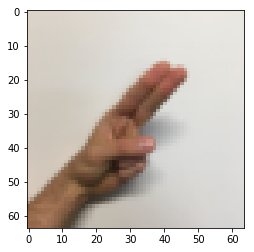

In [21]:
# Exemplo de uma imagem
indice = 55
plt.imshow(X_train_orig[indice])
print ("y = " + str(np.squeeze(Y_train_orig[:, indice])))

Como sempre iremos ajustar a base de dados transformando cada imagem em um vetor e normalizá-la dividindo os pixels por 255. Em seguida iremos converter cada saída em um vetor "one-hot" como mostrado na Figura 1. Execute a célula abaixo para fazer estas tarefas. 

In [22]:
# convertendo a imagem em vetor
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalizando as imagens
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Converter os rótulos de treinamento e teste em uma matriz "one-hot"
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("número de exemplos de treinamento = " + str(X_train.shape[1]))
print ("número de exemplos de teste = " + str(X_test.shape[1]))
print ("Formato dos exemplos de treinamento: " + str(X_train.shape))
print ("Formato dos rótulos de treinamento: " + str(Y_train.shape))
print ("Formato dos exemplos de teste: " + str(X_test.shape))
print ("Formato dos rótulos de teste: " + str(Y_test.shape))

número de exemplos de treinamento = 1080
número de exemplos de teste = 120
Formato dos exemplos de treinamento: (12288, 1080)
Formato dos rótulos de treinamento: (6, 1080)
Formato dos exemplos de teste: (12288, 120)
Formato dos rótulos de teste: (6, 120)


**Nota** o 12288 vem de $64 \times 64 \times 3$. Cada imagem é um quadrado, 64 por 64 pixels, e 3 canais (RGB). Por favor, tenha certeza que os formatos fazem sentido antes de continuar.

**Seu objetivo** é construir um algoritmo capaz de reconhecer um sinal com alta precisão. Para fazer isto você irá construir um modelo usando o tensorflow que é parecido com com o modelo que você já construiu usando numpy para reconhecimento de gatos (mas agora usando uma saída softmax). É interessante fazer uma comparação entre o modelo do tensrflow e o modelo previamente implementado.   

**O modelo** será utilizado *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. A camada de saída com SIGMOID será convertida para uma saída SOFTMAX. A camada SOFTMAX generaliza a SIGMOID para o caso de se ter mais de uma classe na saída. 

### 2.1 - Criando "placeholders"

A primeira tarefa é criar argumentos (placeholders) para `X` e `Y`. Isto permitirá que se passem os dados de treinamento na execução da sessão. 

**Exercício:** Implemente a função abaixo para criar os placeholders no tensorflow.

In [23]:
# FUNÇÃO DE AVALIAÇÃO: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Cria os argumentos (placeholders) para a sessão do tensorflow.
    
    Argumentos:
    n_x -- escalar, tamanho de uma imagem como vetor (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- escalar, número de classes (de 0 a 5, portanto -> 6)
    
    Retorna:
    X -- placeholder para os dados de entrada, no formato [n_x, None] e dtype "float"
    Y -- placeholder para os rótulos de entrada, no formato [n_y, None] e dtype "float"
    
    Dica:
    - Você irá utilizar None porque isto nos dá maior flexibilidade no número de exmplos.
      De fato, o número de exemplos durante teste/treinamento é diferente.
    """

    ### INICIE O CÓDIGO AQUI ### (aprox. 2 linhas)
    
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    
    ### TÉRMINO DO CÓDIGO ###
    
    return X, Y

In [24]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_4:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_2:0", shape=(6, ?), dtype=float32)


**Saída esperada**: 

<table> 
    <tr> 
        <td>
            **X**
        </td>
        <td>
        Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32) (não necessariamente Placeholder_1)
        </td>
    </tr>
    <tr> 
        <td>
            **Y**
        </td>
        <td>
        Tensor("Placeholder_2:0", shape=(10, ?), dtype=float32) (não necessariamente Placeholder_2)
        </td>
    </tr>

</table>

### 2.2 - Inicializando os parâmetros

Sua segunda tarefa é inicializar os parâmetros no tensorflow.

**Exercício:** Implemente a função abaixo para inicializar os parâmetros do tensorflow. Você irá utilizar a inicialização de Xavier para os pesos e inicializará com zeros os bias. Os formatos são dados abaixo. Como exemplo, para ajudá-lo, para W1 e b1 você pode utilizar:  

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```
Utilize `seed = 1` para garantir que os resultados serão os mesmos.

In [25]:
# FUNÇÃO DE AVALIAÇÃO: initialize_parameters

def initialize_parameters():
    """
    Inicializa parâmetros para construir uma rede neural com tensorflow. Os formatos são:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Retorna:
    parameters -- um dicionário de tensores contendo W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # ajuste a semente com 1 para ajustar os resultados
        
    ### INICIE O SEU CÓDIGO AQUI ### (aprox. 6 linhas de código)
    
    W1 = tf.get_variable("W1", [25, 12288], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    ### TÉRMINO DO CÓDIGO ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [26]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


**Saída esperada**: 

<table> 
    <tr> 
        <td>
            **W1**
        </td>
        <td>
         < tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b1**
        </td>
        <td>
        < tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **W2**
        </td>
        <td>
        < tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b2**
        </td>
        <td>
        < tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref >
        </td>
    </tr>

</table>

Como esperado, os parâmetros ainda não foram avaliados. 

### 2.3 - Propagação para frente usando tensorflow 

Agora vamos implementar a propagação para frente utilizando o tensorflow. A função recebe um dicionário de parâmetros e irá executar o passo completo para frente. As funções que você irá utilizar são:  

- `tf.add(...,...)` para fazer a adição.
- `tf.matmul(...,...)` para fazer a multiplicação de matrizes.
- `tf.nn.relu(...)` para aplicar a função de ativação ReLu.

**Exercício:** Implemente o passo de propagação para frente em uma rede neural. Os equivalentes em numpy são comentados no código abaixo para que você entenda o processo. É importante notar que a propagação para frente para em `z3`. A razão é que no tensorflow a saída da última camada linear é dada como entrada para a função computando a perda. Logo, você não irá precisar do `a3`!



In [27]:
# FUNÇÃO DE AVALIAÇÃO: forward_propagation

def forward_propagation(X, parameters):
    """
    Implemente a propagação para frente para o modelo: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Argumentos:
    X -- argumento representando o conjunto de entrada no formato (tamanho da entrada, número de exemplos)
    parameters -- dicinário python contendo os parâmetros "W1", "b1", "W2", "b2", "W3", "b3"
                  os formatos são dados na função initialize_parameters

    Retorna:
    Z3 -- a saída da última camada linear
    """
    
    # Recupera os parâmetros do dicionário "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### INICIE O SEU CÓDIGO AQUI ### (aprox. 5 linhas)              # Equivalente em Numpy:
    
    Z1 = tf.add(tf.matmul(W1, X), b1)                               # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                             # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                              # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                             # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                              # Z3 = np.dot(W3,Z2) + b3
    
    ### TÉRMINO DO CÓDIGO ###
    
    return Z3

In [28]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


**Saída esperada**: 

<table> 
    <tr> 
        <td>
            **Z3**
        </td>
        <td>
        Tensor("Add_2:0", shape=(6, ?), dtype=float32)
        </td>
    </tr>

</table>

Você deve ter percebido que a propagação para frente não retorna cache algum. Você irá entender este processo mais abaixo, quando formos executar a propagação para trás. 

### 2.4 Determinação do custo

Como visto antes, é muito fácil computar o custo usando:
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
**Exercício**: Implemente a função de custo abaixo. 
- É importante saber que as entradas "`logits`" e "`labels`" da função `tf.nn.softmax_cross_entropy_with_logits` são esperados no formato (número de exemplos, número de classes). Já fizemos a transposta de Z3 e Y para você.
- A função `tf.reduce_mean` basicamente faz a soma sobre os exemplos.

In [29]:
#FUNÇÃO DE AVALIAÇÃO : compute_cost 

def compute_cost(Z3, Y):
    """
    Determina o custo.
    
    Argumentos:
    Z3 -- saída da propagação para frente (saída da última camada LINEAR), no formato (6, número de exemplos)
    Y -- vetor com os rótulos corretos, no mesmo formato de Z3.
    
    Retorna:
    cost - Tensor da função de custo.
    """
    
    # ajusta logits e labels para a função tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### INICIE O SEU CÓDIGO AQUI### (1 linha de código)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    ### TÉRMINO DO CÓDIGO ###
    
    return cost

In [30]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("custo = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

custo = Tensor("Mean:0", shape=(), dtype=float32)


**Saída esperada**: 

<table> 
    <tr> 
        <td>
            **custo**
        </td>
        <td>
        Tensor("Mean:0", shape=(), dtype=float32)
        </td>
    </tr>

</table>

### 2.5 - Propagação para trás & atualização de parâmetros

É aqui que você vai ficar fã dos frameworks de programação. Toda a propagação para trás e a atualização de parâmetros é feito em uma linha de código. É bem simples incorporar esta linha no modelo. 

Após determinar o custo, você irá criar um objeto do tipo "`optimizer`". Você deve chamar este objeto em conjunto com o custo quando executar a tf.session. Quando invocada, ela irá executar a otimização do custo com o método selecionado e a taxa de aprendizado escolhida.  

Por exemplo, para o Gradiente Descendente o otimizador seria:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

Para construir o otimizador você deve utilizar:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

Isto executa toda a propagação para trás passando pelo grafo de computação do tensorflow na ordem reversa, a partir dos custos computados.

**Nota** Na codificação, frequentemente, estamos utilizando `_` como uma variável para armazenar valores que não iremos utilizar no processo. Aqui, `_` recebe os valores avaliados pelo `optimizer`, que não serão utilizados (e `c` recebe o valor da variável  `cost`). 

### 2.6 - Construindo o modelo

Agora iremos por tudo junto! 

**Exercício:** Implemente o modelo. Você deve chamar as funções implementadas previamente.

In [31]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implementa uma rede neural com 3 camadas usando tensorflow: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Argumentos:
    X_train -- conjunto de treinamento, no formato (tamanho da entrada = 12288, número de exemplos de treinamento = 1080)
    Y_train -- conjunto de rótulos de treinamento, no formato (tamanho da saída = 6, número de exemplos de treinamento = 1080)
    X_test -- conjunto de teste, no formato (tamanho da entrada = 12288, número de exemplos de teste = 120)
    Y_test -- conjunto de rótulos de teste, no formato (tamanho da saída = 6, número de exemplos de teste = 120)
    learning_rate -- taxa de aprendizado da otimização
    num_epochs -- número de épocas do loop de otimização
    minibatch_size -- tamanho do mini-batch
    print_cost -- Se VERDADE imprime o valor do custo a cada 100 épocas
    
    Retorna:
    parameters -- parâmetros aprendidos pelo modelo. Eles podem ser utilizados para prever novas saídas.
    """
    
    ops.reset_default_graph()           # usado para poder executar o modelo diversas vezes sem sobrescrever as variáveis do tf.
    tf.set_random_seed(1)               # usado para manter os resultados consistentes.
    seed = 3                            # usado para manter os resultados consistentes.
    (n_x, m) = X_train.shape            # (n_x: tamanho da entrada, m : número de exemplos do conjunto de treinamento)
    n_y = Y_train.shape[0]              # n_y : tamanho da saída
    costs = []                          # usado para armazenar os valores do custo
    
    # Crie os Placeholders no formato (n_x, n_y)
    ### INICIE O SEU CÓDIGO AQUI ### (1 linha)
    
    X, Y = create_placeholders(n_x, n_y)
    
    ### TÉRMINO DO CÓDIGO ###

    # Inicializa os parâmetros
    ### INICIE O SEU CÓDIGO AQUI ### (1 linha)
    
    parameters = initialize_parameters()
    
    ### TÉRMINO DO CÓDIGO ###
    
    # Propagação para frente: Constroi a propagação para frente no grafo do tensorflow
    ### INICIE O SEU CÓDIGO AQUI ### (1 linha)
    
    Z3 = forward_propagation(X, parameters)
    
    ### TÉRMINO DO CÓDIGO ###
    
    # Função de custo: Adiciona a função de custo ao grafo do tensorflow
    ### INICIE O SEU CÓDIGO AQUI ### (1 linha)
    
    cost = compute_cost(Z3, Y)
    
    ### TÉRMINO DO CÓDIGO ###
    
    # Propagação para trás: Define o otimizador do tensorflow. Use o AdamOptimizer.
    ### INICIE O SEU CÓDIGO AQUI ### (1 linha)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    ### TÉRMINO DO CÓDIGO ###
    
    # Inicialização de todas os variáveis
    init = tf.global_variables_initializer()

    # Inicializa a sessão para computar o grafo do tensorflow
    with tf.Session() as sess:
        
        # Executa a inicialização
        sess.run(init)
        
        # Executa o loop de treinamento
        for epoch in range(num_epochs):

            epoch_cost = 0.                           # Define o custo relacionado a uma época
            num_minibatches = int(m / minibatch_size) # número de mini-batches do tamanho minibatch_size no conjunto de treinamento
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Seleciona o mini-batch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANTE: A linha que executa o grafo em um mini-batch.
                # Executa a sessão com o "optimizer" e o "cost", o feed_dict deve conter o mini-batch para (X,Y).
                ### INICIE O SEU CÓDIGO AQUI ### (1 linha)
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

    
                ### TÉRMINO DO CÓDIGO ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Imprime o custo para cada época
            if print_cost == True and epoch % 100 == 0:
                print ("Custo após a época %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plota o custo
        plt.plot(np.squeeze(costs))
        plt.ylabel('custo')
        plt.xlabel('interações (por dez)')
        plt.title("Taxa de aprendizado =" + str(learning_rate))
        plt.show()

        # Salva os parâmetros em uma variável
        parameters = sess.run(parameters)
        print ("Parâmetros foram aprendidos!")

        # Calcula as predições
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calcula a precisão no conjunto de teste
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Precisão de treinamento:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Precisão de teste:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Execute a célula abaixo para treinar o seu modelo. O "Custo após 100 épocas" deve ser 1.016458. Se não conferir, não perca tempo; interrompa o treinamento clicando no quadrado (⬛) no menu superior do notebook, e verifique o seu código. Se o custo estiver correto deixe seguir o treinamento. O processo todo deve levar em torno de 5 minutos!

Custo após a época 0: 1.855702
Custo após a época 100: 1.016458
Custo após a época 200: 0.733102
Custo após a época 300: 0.572915
Custo após a época 400: 0.468685
Custo após a época 500: 0.381068
Custo após a época 600: 0.313809
Custo após a época 700: 0.254146
Custo após a época 800: 0.203801
Custo após a época 900: 0.166393
Custo após a época 1000: 0.141141
Custo após a época 1100: 0.107718
Custo após a época 1200: 0.086261
Custo após a época 1300: 0.060924
Custo após a época 1400: 0.050927


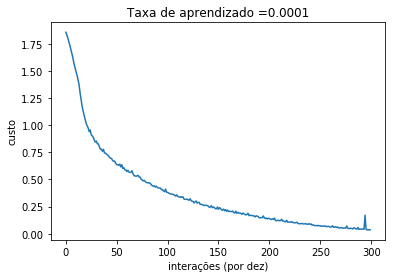

Parâmetros foram aprendidos!
Precisão de treinamento: 0.9990741
Precisão de teste: 0.725


In [32]:
parameters = model(X_train, Y_train, X_test, Y_test)

**Saída esperada**:

<table> 
    <tr> 
        <td>
            **Precisão no treinamento**
        </td>
        <td>
        0.999074
        </td>
    </tr>
    <tr> 
        <td>
            **Precisão no teste**
        </td>
        <td>
        0.716667
        </td>
    </tr>

</table>

Muito bem, seu algoritmo consegure reconhecer sinais em imagem representando valores de 0 a 5 com uma precisão de 71.7%.

**Nota**:
- Seu modelo parece grande o bastante para se ajustar ao conjunto de treinamento muito bem. Porém, dada a diferença entre a precisão no conjunto de treinamento e no conjunto de teste seria recomendado o uso de regularização (L2 ou dropout) para reduzir o superajuste. 
- Pense sobre a sessão como um bloco de código para treinamento do modelo. Cada vez que você executa uma sessão em um mini-batch ele treina os parâmetros. No total você executou uma sessão várias vezes (1500 épocas) até obter parâmetros bem treinados. 

### 2.7 - Teste com uma imagem sua (opcional)

Muito bem, você terminou esta tarefa. Você pode testar o seu trabalho com uma imagem sua e ver a saída do seu modelo. Para isto faça:
    1. Clique em "File" na barra superior deste notebook, e então clique em "Open" para ir no seu diretório.
    2. Adicione a sua imagem ao diretório, na pasta "imagens".
    3. Escreva no código abaixo o nome da sua imagem.
    4. Execute a célula abaixo para ver o resultado do seu algoritmo!

/Users/ahirtonlopes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/ahirtonlopes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


O algoritmo dá como resposta: y = 2


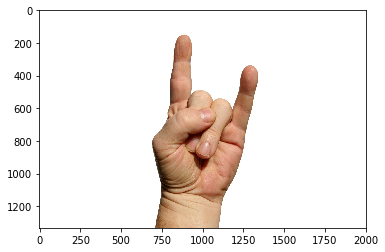

In [37]:
import scipy
from PIL import Image
from scipy import ndimage

## INICIE O SEU CÓDIGO AQUI ## (coloque o nome da sua imagem) 
my_image = "2fingers.jpg"
## TÉRMINO DO CÓDIGO ##

# Faz o pré-processamento da sua imagem para uso pelo algoritmo.
fname = "./images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("O algoritmo dá como resposta: y = " + str(np.squeeze(my_image_prediction)))

<font color='blue'>
**O que você deve se lembrar**:
- Tensorflow é um framework de programação utilizado para aprendizado profundo.
- Os dois objetos principais da tensorflow são Tensores e Operadores. 
- Quando você codifica em tensorflow você deve seguir as seguintes etapas:
    - Criar um grafo contendo os Tensores (Variáveis, Placeholders ...) e operações (tf.matmul, tf.add, ...)
    - Criar uma sessão
    - Inicializar a sessão
    - Executar a sessão para computar o grafo.
- Você pode executar o grafo diversas vezes como você viu no modelo.
- A propagação para trás e otimização são feitas automaticamente quando a sessão é executada pelo "optimizer".